In [ ]:
# Data loading and preprocessing
from sklearn.datasets import make_moons, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Classification models
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Hyper-parameter turning
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

import warnings; warnings.filterwarnings('ignore')

# MLP Classifier 연습

In [ ]:
!pip install mglearn

In [ ]:
import mglearn

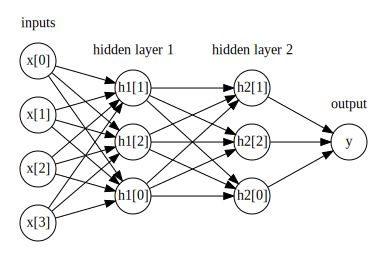

In [ ]:
mglearn.plots.plot_two_hidden_layer_graph()

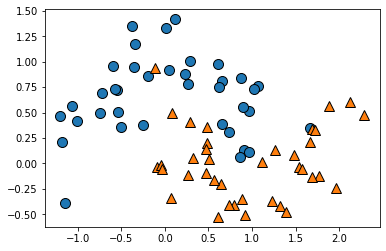

In [ ]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                            random_state=42)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train);

In [ ]:
mlp = MLPClassifier(solver='lbfgs', random_state=0)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

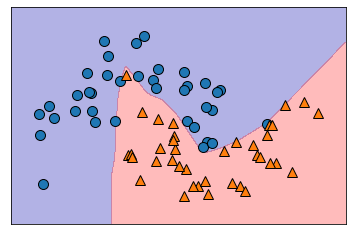

In [ ]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train);

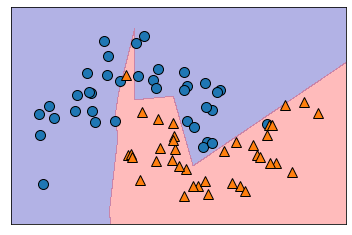

In [ ]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train);

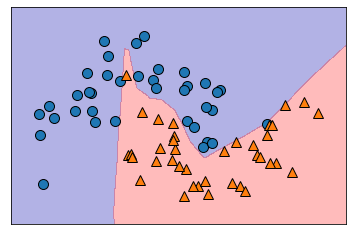

In [ ]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[100, 100])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train);

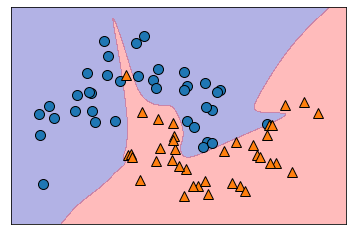

In [ ]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[100, 100],
                    activation='tanh')
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train);

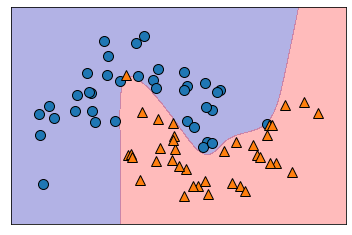

In [ ]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[100, 100],
                    activation='tanh',
                    alpha=0.1)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train);

## 유방암 데이터셋 - MLP

In [ ]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [ ]:
X_train.max(axis=0)

array([2.811e+01, 3.381e+01, 1.885e+02, 2.501e+03, 1.447e-01, 3.114e-01,
       4.268e-01, 2.012e-01, 3.040e-01, 9.744e-02, 2.873e+00, 4.885e+00,
       2.198e+01, 5.422e+02, 2.333e-02, 1.064e-01, 3.960e-01, 5.279e-02,
       6.146e-02, 2.984e-02, 3.604e+01, 4.954e+01, 2.512e+02, 4.254e+03,
       2.226e-01, 1.058e+00, 1.252e+00, 2.903e-01, 6.638e-01, 2.075e-01])

In [ ]:
mlp = MLPClassifier(solver='lbfgs', random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
print("Train acc.: ", mlp.score(X_train, y_train))
print("Test  acc.: ", mlp.score(X_test, y_test))

Train acc.:  0.3732394366197183
Test  acc.:  0.3706293706293706


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.max(axis=0)

array([ 3.93179406,  3.5400153 ,  3.94763309,  5.11826642,  3.49269239,
        4.10343117,  4.31174808,  3.92170223,  4.46590352,  5.08792003,
        8.60510904,  6.73170851,  9.29407305, 10.3491437 ,  5.7886735 ,
        4.79720549, 11.59761511,  6.95731426,  5.00715477,  9.94484456,
        4.03414639,  3.94582347,  4.23699685,  5.74792023,  3.93375882,
        5.30687697,  4.95908146,  2.6703755 ,  5.91848551,  6.97408433])

In [ ]:
mlp = MLPClassifier(solver='lbfgs', random_state=42)
mlp.fit(X_train, y_train)
print("Train acc.: ", mlp.score(X_train_scaled, y_train))
print("Test  acc.: ", mlp.score(X_test_scaled, y_test))

Train acc.:  0.8145539906103286
Test  acc.:  0.8531468531468531


# 그리드 서치 연습

In [ ]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train.shape, X_test.shape

((426, 30), (143, 30))

In [ ]:
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm.score(X_test_scaled, y_test)

0.972027972027972

## `GridSearchCV` 예제

In [ ]:
param_grid = {"C": [0.01, 0.1, 1, 10],
              "gamma": [0.01, 0.1, 1, 10]}
grid = GridSearchCV(svm, param_grid=param_grid, cv=5, 
                    n_jobs=-1, verbose=True)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [ ]:
print("Best params    : {}".format(grid.best_params_))
print("Best CV score  : {:.4f}".format(grid.best_score_))
print("Test set score : {:.4f}".format(grid.score(X_test_scaled, y_test)))

Best params    : {'C': 1, 'gamma': 1}
Best CV score  : 0.9812
Test set score : 0.9720


## `Pipeline` + `GridSearchCV` 예제

In [ ]:
pipe = Pipeline([("scalar", MinMaxScaler()),
                 ("svm", SVC())])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scalar', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('svm',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
param_grid = {"svm__C": [0.01, 0.1, 1, 10],
              "svm__gamma": [0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,
                    n_jobs=-1, verbose=True)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scalar',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('svm',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),


In [ ]:
print("Best params    : {}".format(grid.best_params_))
print("Best CV score  : {:.4f}".format(grid.best_score_))
print("Test set score : {:.4f}".format(grid.score(X_test, y_test)))

Best params    : {'svm__C': 1, 'svm__gamma': 1}
Best CV score  : 0.9812
Test set score : 0.9720


## `make_pipeline` + `GridSearchCV` 예제

In [ ]:
pipe2 = make_pipeline(MinMaxScaler(), SVC(C=100))
pipe2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('svc',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
param_grid = {"svc__C": [0.01, 0.1, 1, 10],
              "svc__gamma": [0.01, 0.1, 1, 10]}
grid2 = GridSearchCV(pipe2, param_grid=param_grid, cv=5,
                    n_jobs=-1, verbose=True)
grid2.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('minmaxscaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('svc',
                                        SVC(C=100, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=Fa

In [ ]:
print("Best params    : {}".format(grid.best_params_))
print("Best CV score  : {:.4f}".format(grid.best_score_))
print("Test set score : {:.4f}".format(grid.score(X_test, y_test)))

Best params    : {'svm__C': 1, 'svm__gamma': 1}
Best CV score  : 0.9812
Test set score : 0.9720


In [ ]:
pipe = Pipeline([("preprocessing", StandardScaler()),
                 ("classifier", SVC())])

param_grid = [{"preprocessing": [StandardScaler()],
               "classifier": [SVC()],
               "classifier__C": [0.01, 0.1, 1, 10],
               "classifier__gamma": [0.01, 0.1, 1, 10]},
              {"preprocessing": [None],
               "classifier": [RandomForestClassifier(n_estimators=100)],
               "classifier__max_features": [1, 2, 3]}]

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,
                    n_jobs=-1, verbose=10)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1846s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0740s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1049s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1890s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    3.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinki...
                                            

In [ ]:
print("Best params    : {}".format(grid.best_params_))
print("Best CV score  : {:.4f}".format(grid.best_score_))
print("Test set score : {:.4f}".format(grid.score(X_test, y_test)))

Best params    : {'classifier': SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}
Best CV score  : 0.9859
Test set score : 0.9790


In [ ]:
param_grid = [{"preprocessing": [None],
               "classifier": [RandomForestClassifier(n_estimators=100)],
               "classifier__max_features": [1, 2, 3]}]

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,
                    n_jobs=-1, verbose=10)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinki...
                                            

In [ ]:
print("Best params    : {}".format(grid.best_params_))
print("Best CV score  : {:.4f}".format(grid.best_score_))
print("Test set score : {:.4f}".format(grid.score(X_test, y_test)))

Best params    : {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_features': 1, 'preprocessing': None}
Best CV score  : 0.9578
Test set score : 0.9371


In [ ]:
param_grid = [{"preprocessing": [StandardScaler()],
               "classifier": [MLPClassifier(random_state=0)],
               "classifier__solver": ["lbfgs", "adam"],
               "classifier__hidden_layer_sizes": [(100), (10, 10), (100, 100)],
               "classifier__activation": ["relu", "tanh"]
               }]

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,
                    n_jobs=-1, verbose=10)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0667s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0591s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   17.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinki...
                                            

In [ ]:
print("Best params    : {}".format(grid.best_params_))
print("Best CV score  : {:.4f}".format(grid.best_score_))
print("Test set score : {:.4f}".format(grid.score(X_test, y_test)))

Best params    : {'classifier': MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), 'classifier__activation': 'tanh', 'classifier__hidden_layer_sizes': (100, 100), 'classifier__solver': 'adam', 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}
Best CV score  : 0.9836
Test set score : 0.9510


In [ ]:
pipe = Pipeline([("preprocess-1", MinMaxScaler()),
                 ("preprocess-2", None),
                 ("classifier", SVC())])

param_grid = [{"preprocess-1": [MinMaxScaler()],
               "preprocess-2": [None],
               "classifier": [SVC()],
               "classifier__C": [0.01, 0.1, 1, 10],
               "classifier__gamma": [0.01, 0.1, 1, 10]},
              {"preprocess-1": [None],
               "preprocess-2": [None],
               "classifier": [RandomForestClassifier(n_estimators=100)],
               "classifier__max_features": [1, 2, 3]},
              {"preprocess-1": [StandardScaler()],
               "preprocess-2": [None],
               "classifier": [MLPClassifier(random_state=0)],
               "classifier__solver": ["lbfgs", "adam"],
               "classifier__hidden_layer_sizes": [(100), (10, 10), (100, 100)],
               "classifier__activation": ["relu", "tanh"]
               }]

grid = GridSearchCV(estimator=pipe,
                    param_grid=param_grid,
                    cv=5,
                    n_jobs=-1, verbose=10)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0491s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0641s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1190s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1857s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (3.2760s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   12.4s
[Parallel(n_

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess-1',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('preprocess-2', None),
                                       ('classifier',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=No...
                                                       valida

In [ ]:
print("Best params    : {}".format(grid.best_params_))
print("Best CV score  : {:.4f}".format(grid.best_score_))
print("Test set score : {:.4f}".format(grid.score(X_test, y_test)))

Best params    : {'classifier': MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), 'classifier__activation': 'tanh', 'classifier__hidden_layer_sizes': (100, 100), 'classifier__solver': 'adam', 'preprocess-1': StandardScaler(copy=True, with_mean=True, with_std=True), 'preprocess-2': None}
Best CV score  : 0.9836
Test set score : 0.9510
